# 0. Setting up the environement

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import cm
%matplotlib inline

In [56]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """

    :param width:
    :param fraction:
    :return:
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches.
    inches_per_pt = 1 / 72.27

    # Golden ration to set aesthetic figure height.
    # https://disq.us/p/2940ij3
    golden_ratio = (5 ** (1 / 2) - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    # if width == fig_text_width:
    #     fig_height_in /= 2

    if width == fig_width:
        fig_height_in *= (2.5/5)

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

# Some configs on matplotlib.
tex_fonts = {
    # Use Latex to write all text.
    'text.usetex': True,
    'font.family': 'serif',
    # Use 10pt font in plots, to match 10pt font in document.
    'axes.labelsize': 10,
    'font.size': 10,
    # Make the legend/label fonts a little smaller.
    'legend.fontsize': 5,
    'legend.handlelength': 1.0,
    'legend.labelspacing': 0.5,
    'legend.columnspacing': 1.0,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,

    'hatch.linewidth': 0.15,

    'lines.linewidth': 0.5,
}

# Define a formatter function to show one decimal place
def one_decimal_formatter(x, pos):
    return f'{x:.1f}'

plt.rcParams.update(tex_fonts)

plot_cmp = 'Greys'


# Figure width base on the column width of the Latex document.
fig_width = 252
fig_text_width = 516

# How are bonds priced ?

## Theoretical bon pricing model

$P = \sum_{t=1}^{n}\frac{C}{(1+r)^t} + \frac{F}{(1+r)^n}$

In [57]:

# Bond parameters
face_value = 1  # face value of the bond
coupon_rate = 0.03  # 3% coupon rate
years_to_maturity = 10  # 10 years
payments_per_year = 1  # semi-annual payments

# Calculate coupon payment
def coupon_payment(coupon_rate, face_value, payments_per_year):
    return (coupon_rate * face_value) / payments_per_year

# Function to calculate bond price
def bond_price(ytm, face_value, coupon_payment, years_to_maturity, payments_per_year):
    periods = years_to_maturity * payments_per_year
    discount_factor = 1 + ytm / payments_per_year
    coupon_present_value = sum([coupon_payment / (discount_factor**t) for t in range(1, periods + 1)])
    face_value_present_value = face_value / (discount_factor**periods)
    return coupon_present_value + face_value_present_value

def convexity(ytm, face_value, coupon_payment, years_to_maturity, payments_per_year):
    periods = years_to_maturity * payments_per_year
    discount_factor = 1 + ytm / payments_per_year
    coupon_present_value = sum([coupon_payment / (discount_factor**(t+1)) for t in range(1, periods + 1)])
    face_value_present_value = face_value / (discount_factor**(periods+1))
    return coupon_present_value + face_value_present_value

## Impact of Market Interest Rates on Bond Prices

In [58]:
# Range of market interest rates (YTM) from 0.01 to 0.25
market_rates = np.linspace(0.0, 0.10, 100)

# Calculate bond prices for each market rate.
# Here, we vary the time to maturiy to see the impact of maturity on the relationship between interest rates and bond prices.
bond_prices_1ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 1, payments_per_year) for ytm in market_rates]
bond_prices_3ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 3, payments_per_year) for ytm in market_rates]
bond_prices_5ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 5, payments_per_year) for ytm in market_rates]
bond_prices_10ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 10, payments_per_year) for ytm in market_rates]
bond_prices_30ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 30, payments_per_year) for ytm in market_rates]
bond_prices_50ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 50, payments_per_year) for ytm in market_rates]
bond_prices_AT_70ytm_1_5_cr = [bond_price(ytm, face_value, coupon_payment(0.015, face_value, 1), 70, payments_per_year) for ytm in market_rates]
bond_prices_AT_30ytm_0_75_cr = [bond_price(ytm, face_value, coupon_payment(0.0075, face_value, 1), 30, payments_per_year) for ytm in market_rates]
bond_prices_FR_52ytm_0_75_cr = [bond_price(ytm, face_value, coupon_payment(0.0075, face_value, 1), 52, payments_per_year) for ytm in market_rates]
bond_prices_ES_50ytm_3_45_cr = [bond_price(ytm, face_value, coupon_payment(0.0345, face_value, 1), 50, payments_per_year) for ytm in market_rates]
bond_prices_100ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 100, payments_per_year) for ytm in market_rates]

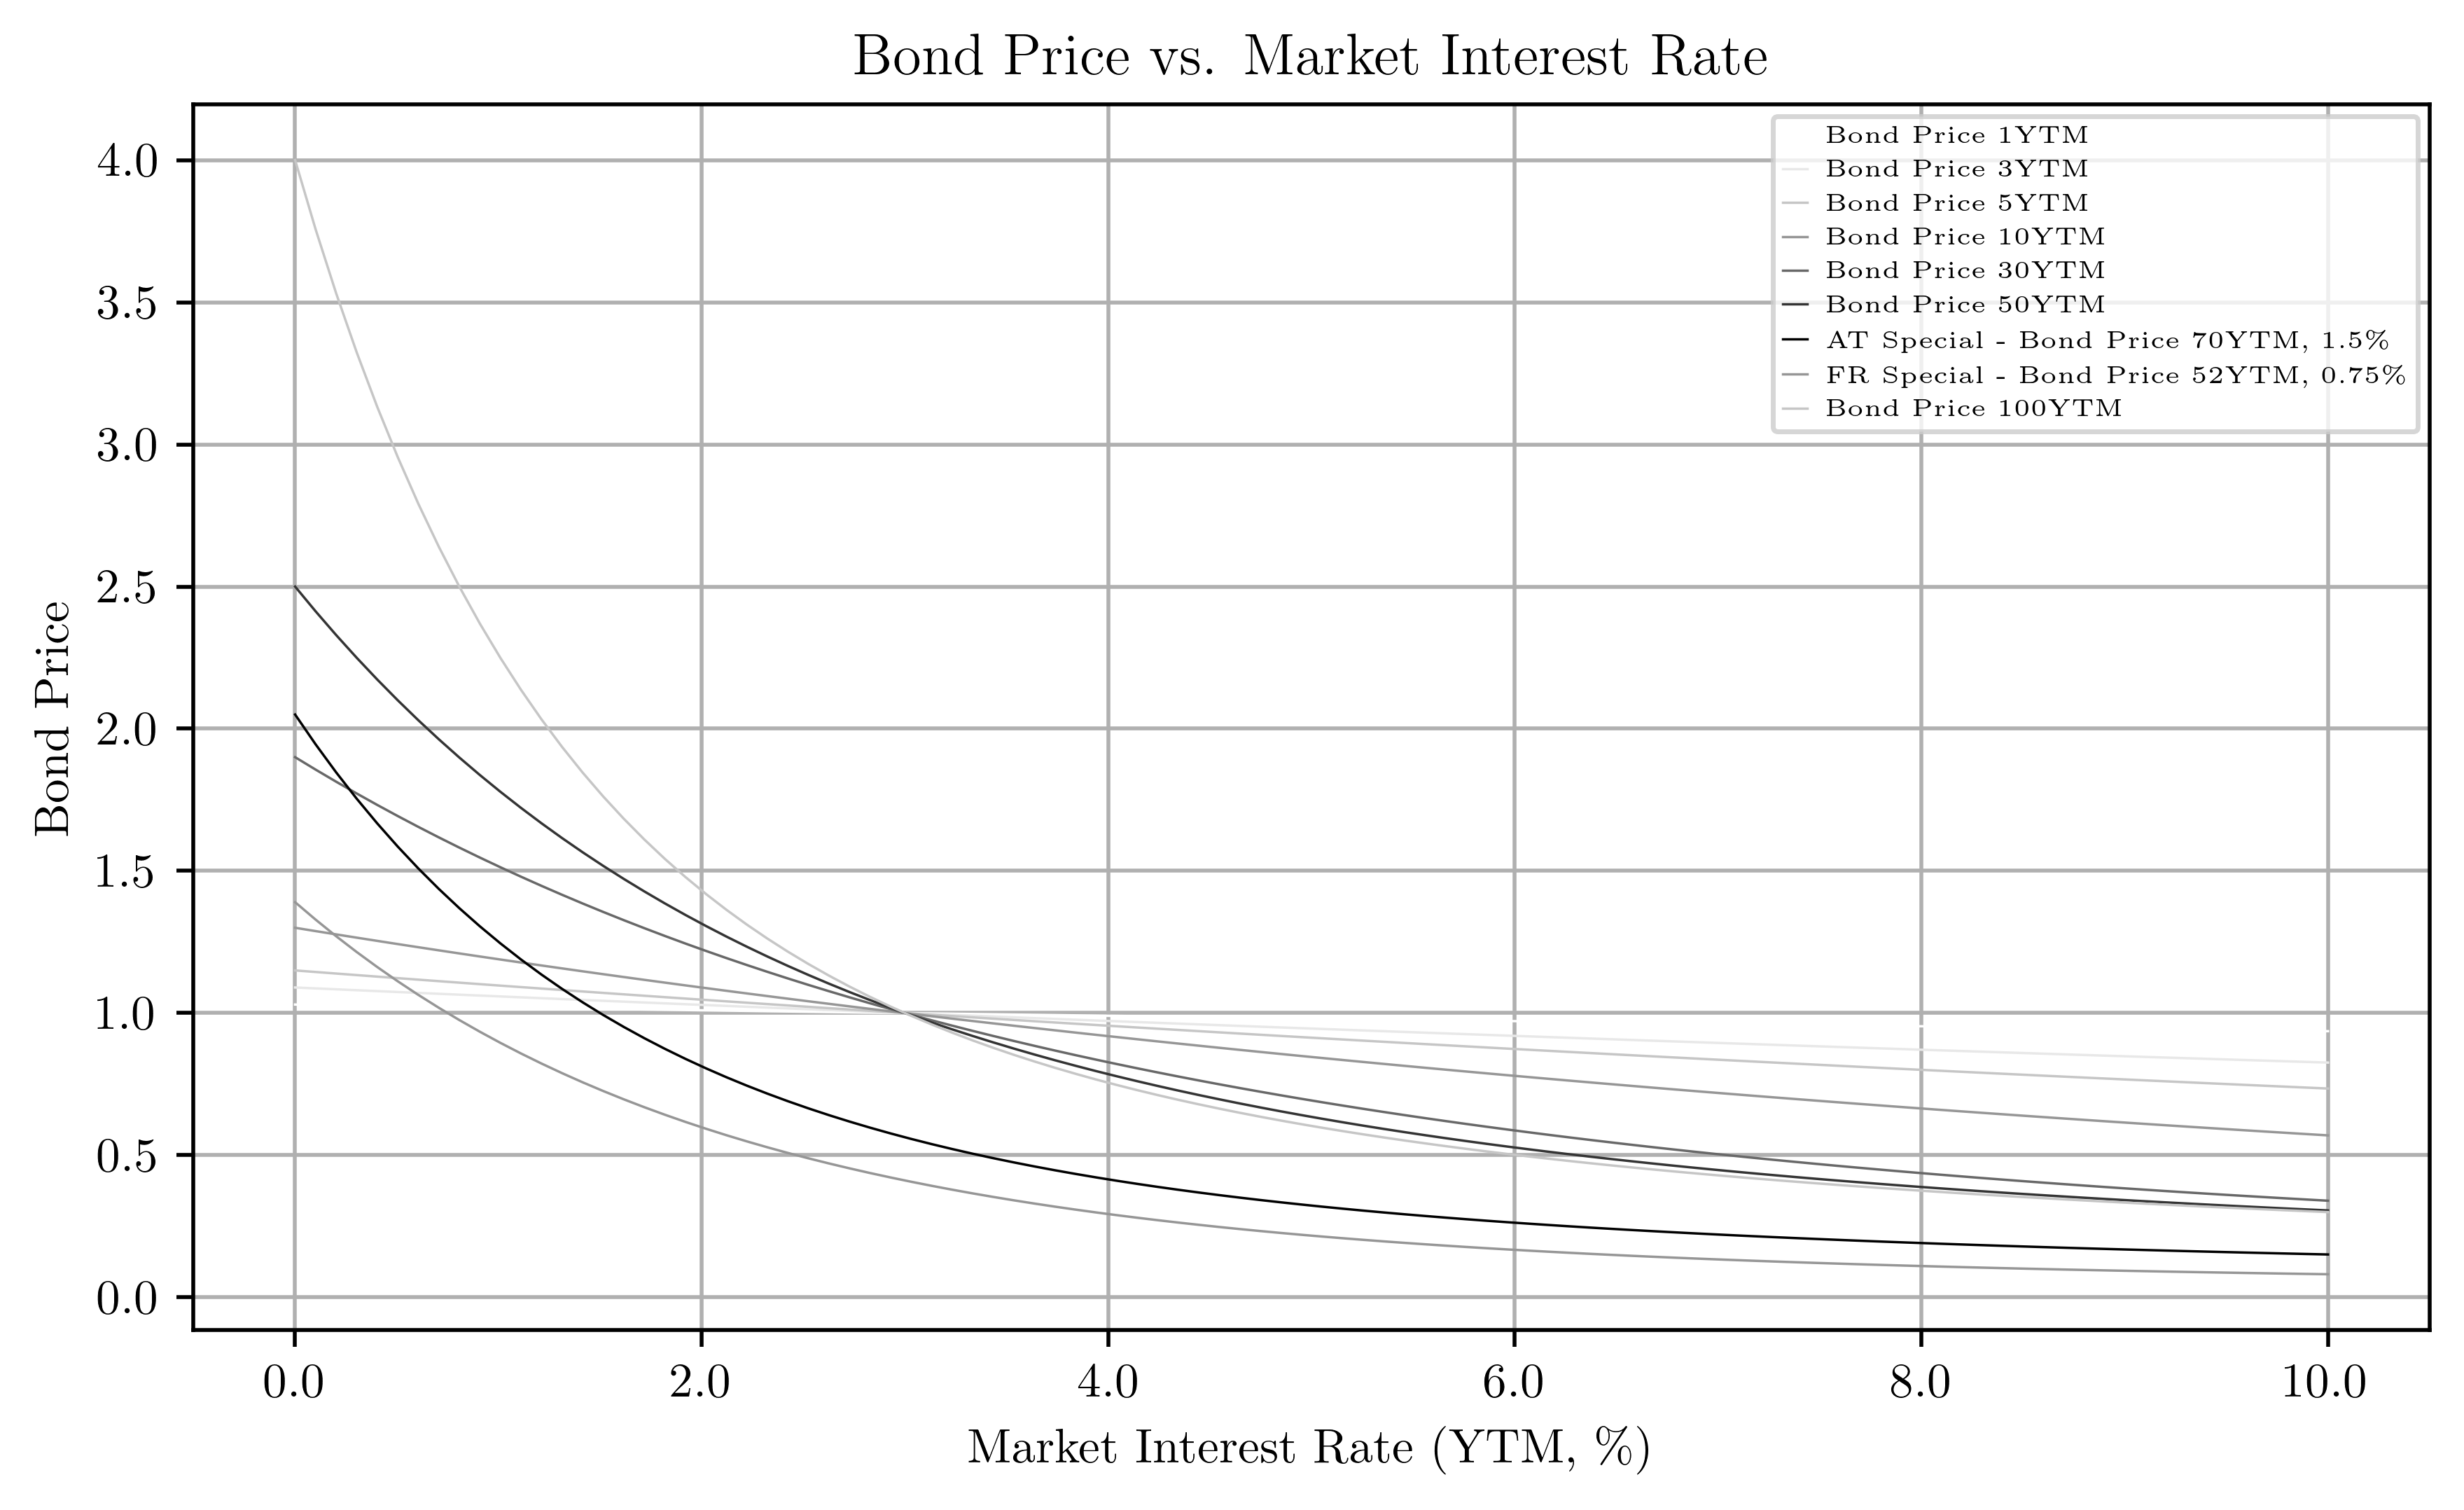

In [59]:
# Define figure dimensions using set_size and tex_fonts
fig_dim = set_size(fig_text_width)

# Plot bond prices against market interest rate with adapted settings
fig, ax = plt.subplots(figsize=fig_dim, dpi=500)

colors = cm.get_cmap(plot_cmp, 7)  # Adjust the number based on the number of lines

# Convert market rates to percentage for x-axis (e.g., 0.05 becomes 5%)
market_rates_percent = market_rates * 100.0

# Plot each bond price series
ax.plot(market_rates_percent, bond_prices_1ytm, label="Bond Price 1YTM", color=colors(0))
ax.plot(market_rates_percent, bond_prices_3ytm, label="Bond Price 3YTM", color=colors(1))
ax.plot(market_rates_percent, bond_prices_5ytm, label="Bond Price 5YTM", color=colors(2))
ax.plot(market_rates_percent, bond_prices_10ytm, label="Bond Price 10YTM", color=colors(3))
ax.plot(market_rates_percent, bond_prices_30ytm, label="Bond Price 30YTM", color=colors(4))
ax.plot(market_rates_percent, bond_prices_50ytm, label="Bond Price 50YTM", color=colors(5))
ax.plot(market_rates_percent, bond_prices_AT_70ytm_1_5_cr, label="AT Special - Bond Price 70YTM, 1.5\%", color=colors(6))
ax.plot(market_rates_percent, bond_prices_FR_52ytm_0_75_cr, label="FR Special - Bond Price 52YTM, 0.75\%", color=colors(3))  # Use a duplicate color if needed
ax.plot(market_rates_percent, bond_prices_100ytm, label="Bond Price 100YTM", color=colors(2))

# Add title and labels with improved layout and grid
ax.set_title("Bond Price vs. Market Interest Rate")
ax.set_xlabel("Market Interest Rate (YTM, \%)")
ax.set_ylabel("Bond Price")
ax.grid(True)
ax.legend()

# Apply one decimal place formatter to the x-axis
ax.xaxis.set_major_formatter(ticker.FuncFormatter(one_decimal_formatter))

# Optimize layout and save figures before showing
plt.tight_layout()
plt.savefig('plots/bonds_price_vs_ytm.png', format='png', dpi=500)
plt.savefig('plots/bonds_price_vs_ytm.pdf', format='pdf', dpi=500)

# Display the plot
plt.show()

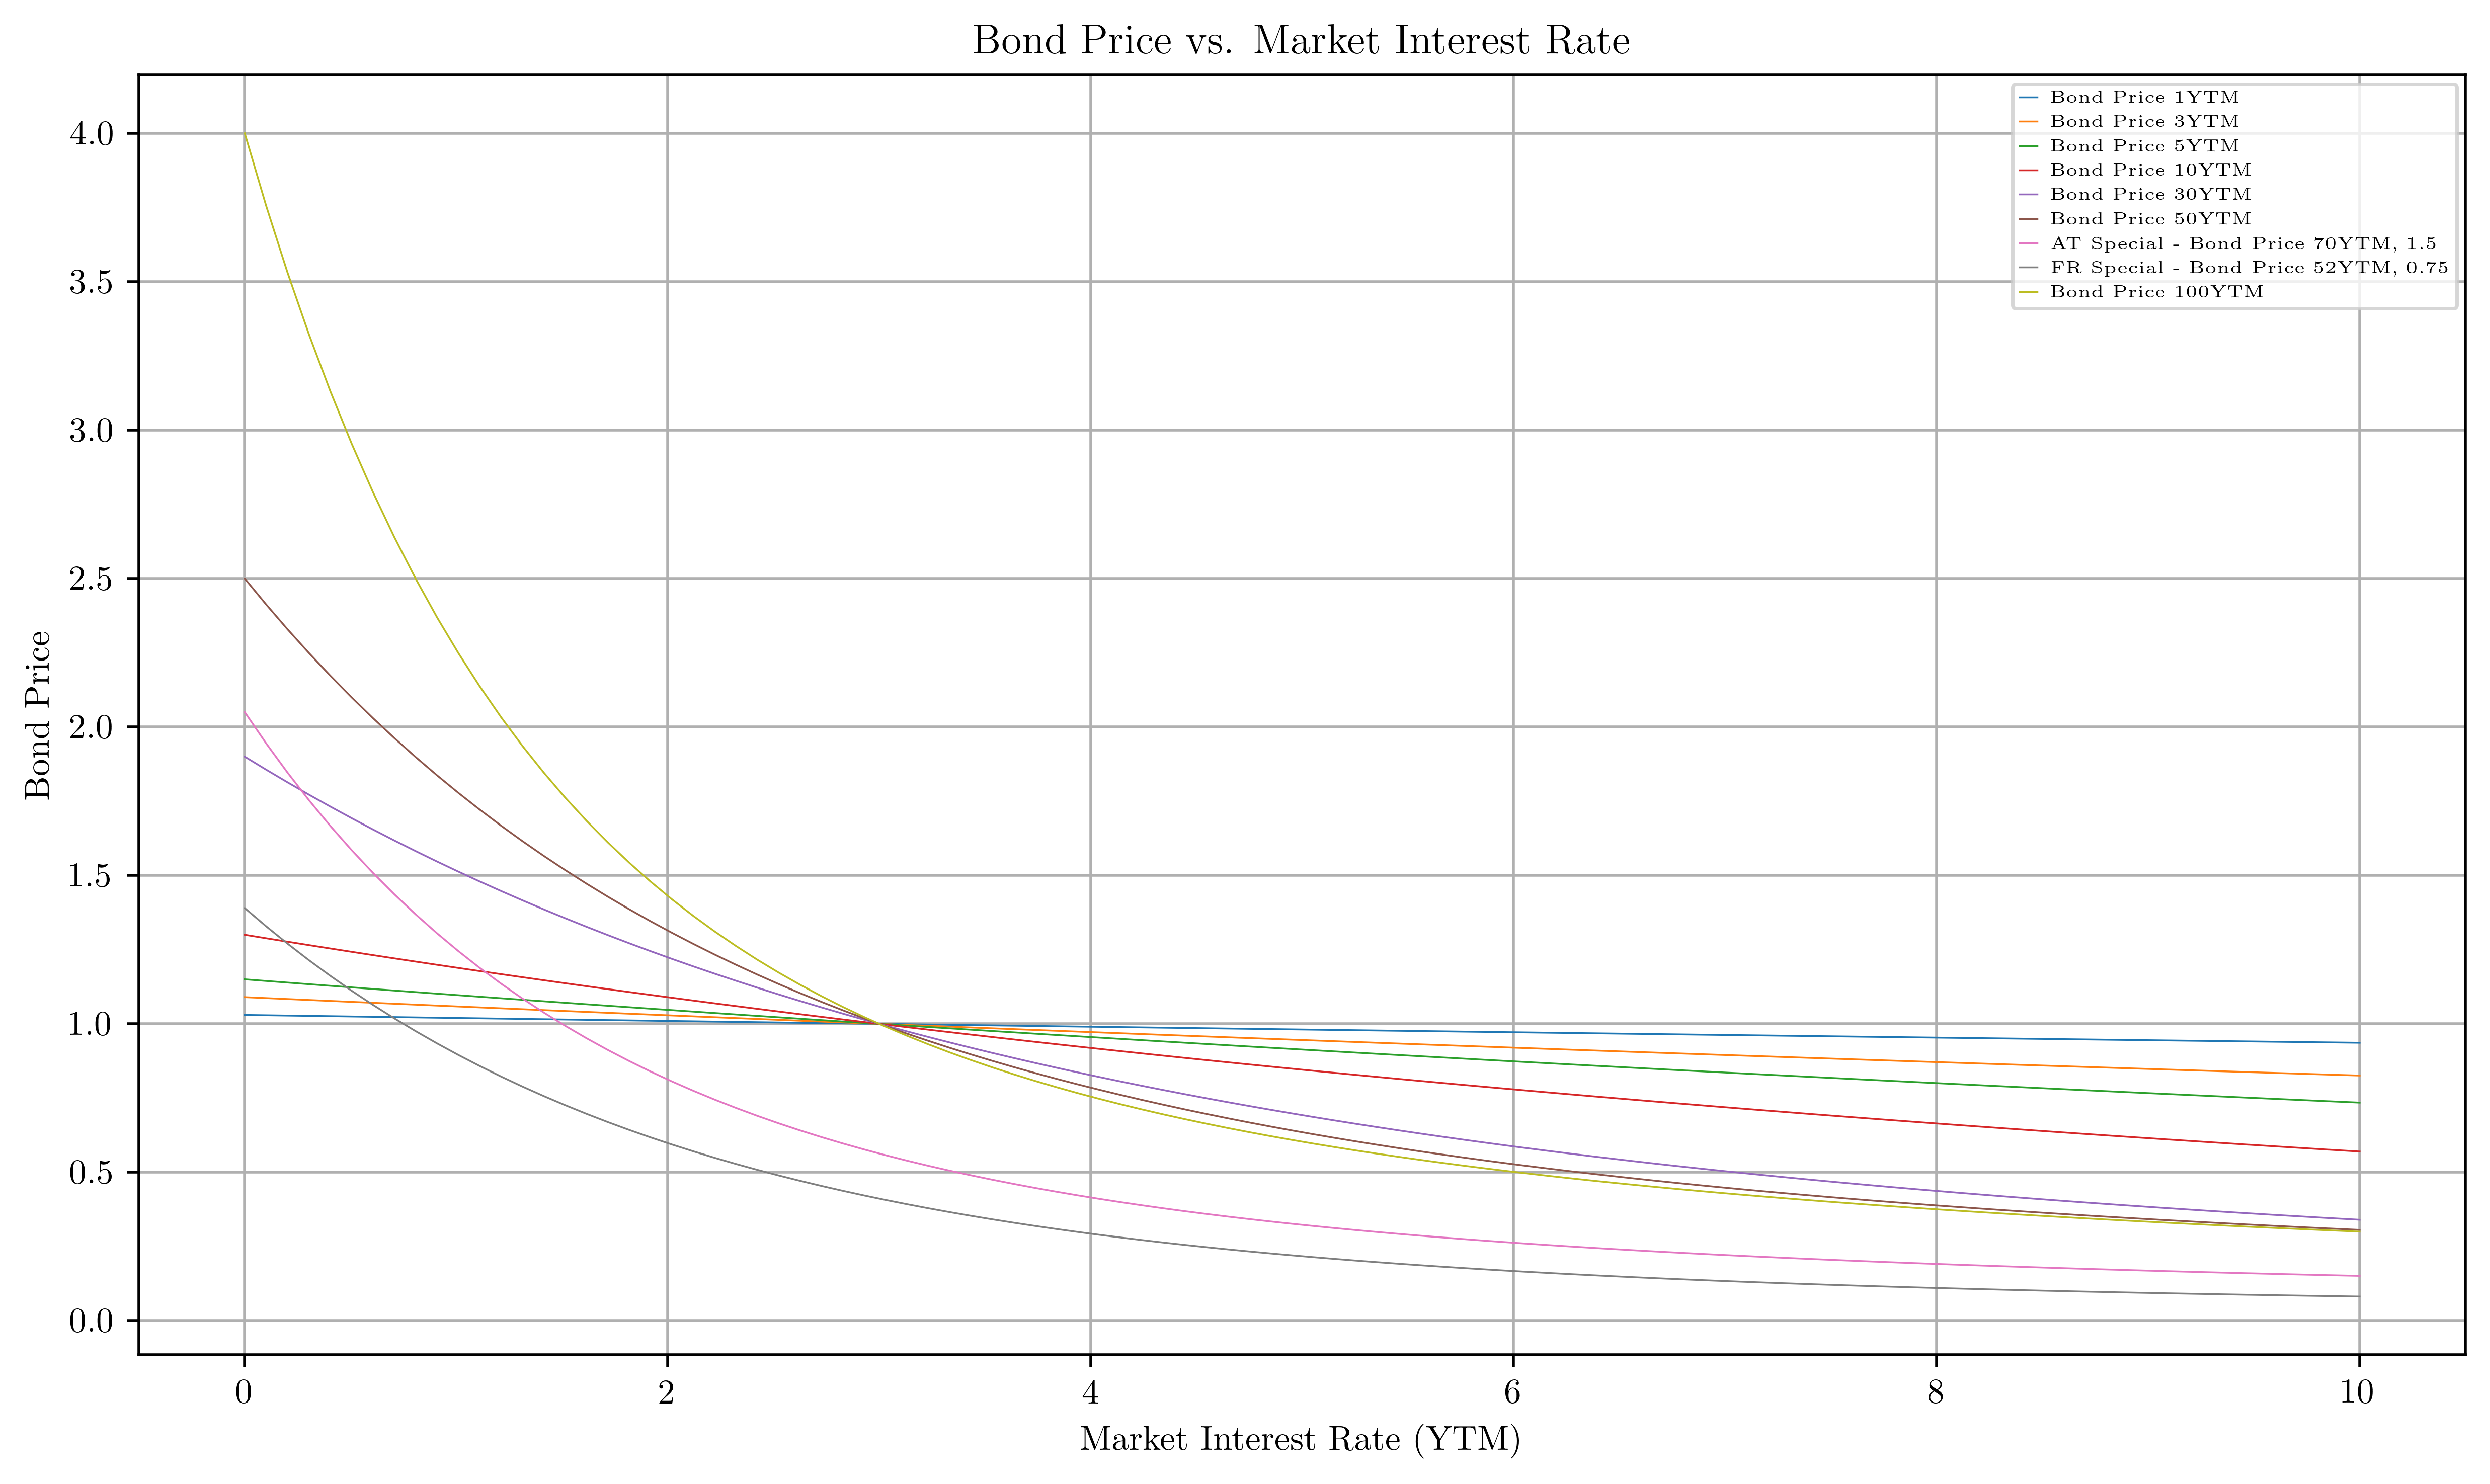

In [60]:
# Plot bond price against market interest rate
plt.figure(figsize=(10, 6), dpi=500)
plt.plot(market_rates * 100.0, bond_prices_1ytm, label="Bond Price 1YTM")
plt.plot(market_rates * 100.0, bond_prices_3ytm, label="Bond Price 3YTM")
plt.plot(market_rates * 100.0, bond_prices_5ytm, label="Bond Price 5YTM")
plt.plot(market_rates * 100.0, bond_prices_10ytm, label="Bond Price 10YTM")
plt.plot(market_rates * 100.0, bond_prices_30ytm, label="Bond Price 30YTM")
plt.plot(market_rates * 100.0, bond_prices_50ytm, label="Bond Price 50YTM")
plt.plot(market_rates * 100.0, bond_prices_AT_70ytm_1_5_cr, label="AT Special - Bond Price 70YTM, 1.5%")
# plt.plot(market_rates * 100.0, bond_prices_AT_30ytm_0_75_cr, label="AT Special - Bond Price 30YTM, 0.75%")
plt.plot(market_rates * 100.0, bond_prices_FR_52ytm_0_75_cr, label="FR Special - Bond Price 52YTM, 0.75%")
# plt.plot(market_rates * 100.0, bond_prices_ES_50ytm_3_45_cr, label="ES Special - Bond Price 50YTM, 3.45%")
plt.plot(market_rates * 100.0, bond_prices_100ytm, label="Bond Price 100YTM")
plt.title("Bond Price vs. Market Interest Rate")
plt.xlabel("Market Interest Rate (YTM)")
plt.ylabel("Bond Price")
plt.grid(True)
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Save the plot in both formats before showing
plt.savefig('plots/bonds_price_vs_ytm.png', format='png')
plt.savefig('plots/bonds_price_vs_ytm.pdf', format='pdf')

# Display the plot
plt.show()

## Observing Time Decay in bond prices

In [61]:
# Range of market interest rates (YTM) from 0.01 to 0.25
time_to_maturity = np.linspace(0, 30, 31, dtype=int)

bond_prices_30ytm = [bond_price(0.03, face_value, coupon_payment(coupon_rate, face_value, 1), ttm, payments_per_year) for ttm in time_to_maturity]

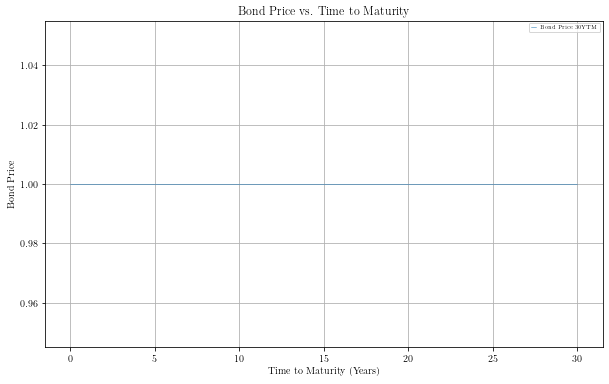

In [62]:
# Plot bond price against market interest rate
plt.figure(figsize=(10, 6))
plt.plot(time_to_maturity, bond_prices_30ytm, label="Bond Price 30YTM")
plt.title("Bond Price vs. Time to Maturity")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Bond Price")
plt.grid(True)
plt.legend()
plt.show()
